In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
# from torch.nn import functional as F_torch
import os
from natsort import natsorted

# Divergence and Laplacian

In [26]:
from physics import calculate_pd

In [27]:
x = torch.linspace(0, 1, 100)
y = torch.linspace(0, 1, 100)
u = torch.outer(torch.pow(x, 2), torch.sin(2 * np.pi * y))
v = torch.outer(torch.cos(2 * np.pi * x), torch.pow(torch.sin(2 * np.pi * y), 2))

In [28]:
u_x_ana = torch.outer(2 * x, torch.sin(2 * np.pi * y))
u_y_ana = torch.outer(torch.pow(x, 2), 2 * np.pi * torch.cos(2 * np.pi * y))
v_x_ana = torch.outer(-2 * np.pi * torch.sin(2 * np.pi * x), torch.pow(torch.sin(2 * np.pi * y), 2))
v_y_ana = torch.outer(torch.cos(2 * np.pi * x), 4 * np.pi * torch.sin(2 * np.pi * y)) * torch.cos(2 * np.pi * y)

In [29]:
u_x, u_y, v_x, v_y = calculate_pd(u=u.unsqueeze(0), v=v.unsqueeze(0))
# u_x, u_y, v_x, v_y = calculate_pd(u=u.transpose(0, 1).unsqueeze(0), v=v.transpose(0, 1).unsqueeze(0))

Text(0.5, 1.0, 'v_y')

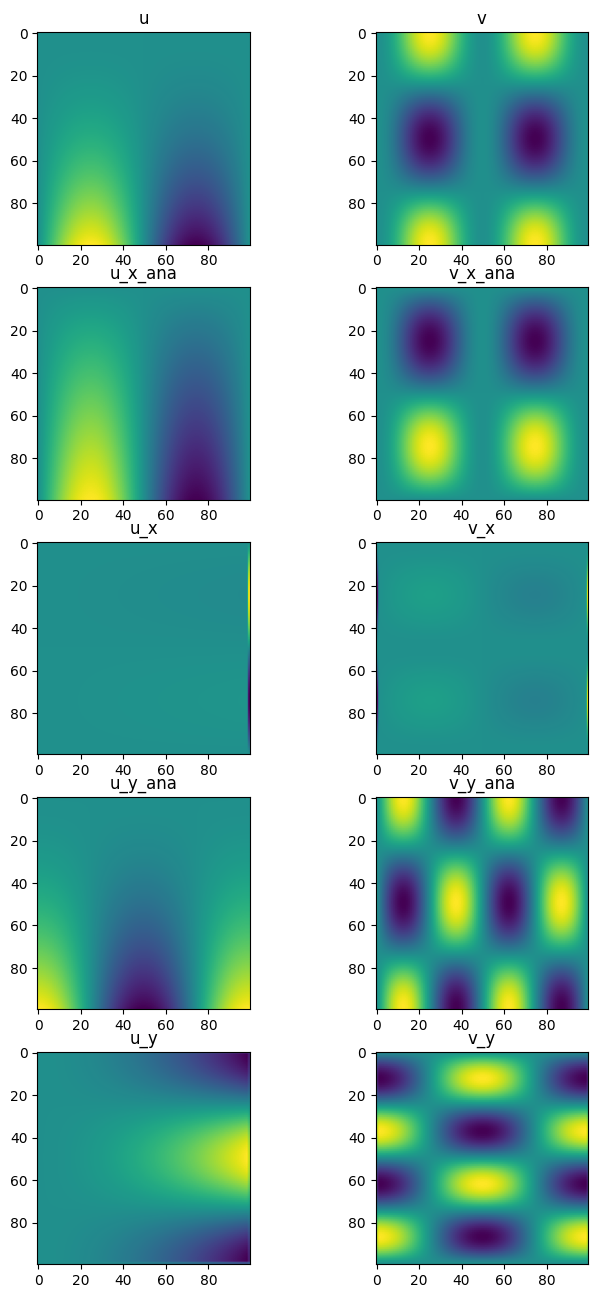

In [25]:
_, axs = plt.subplots(5, 2, figsize=(8, 16))

axs[0, 0].imshow(u)
axs[0, 0].set_title('u')

axs[0, 1].imshow(v)
axs[0, 1].set_title('v')

axs[1, 0].imshow(u_x_ana)
axs[1, 0].set_title('u_x_ana')

axs[1, 1].imshow(v_x_ana)
axs[1, 1].set_title('v_x_ana')

axs[2, 0].imshow(u_x[0][0])
axs[2, 0].set_title('u_x')

axs[2, 1].imshow(v_x[0][0])
axs[2, 1].set_title('v_x')

axs[3, 0].imshow(u_y_ana)
axs[3, 0].set_title('u_y_ana')

axs[3, 1].imshow(v_y_ana)
axs[3, 1].set_title('v_y_ana')

axs[4, 0].imshow(u_y[0][0])
axs[4, 0].set_title('u_y')

axs[4, 1].imshow(v_y[0][0])
axs[4, 1].set_title('v_y')

# plt.tight_layout()

In [3]:
# Dummy derivative filter weights
xderi_weights = torch.tensor([[3, 0, -3], [10, 0, -10], [3, 0, -3]], dtype=torch.float32).view((1, 1, 3, 3))
yderi_weights = torch.tensor([[3, 10, 3], [0, 0, 0], [-3, -10, -3]], dtype=torch.float32).view((1, 1, 3, 3))
zderi_weights = torch.tensor([[3, 0, -3], [10, 0, -10], [3, 0, -3]], dtype=torch.float32).view((1, 1, 3, 3))

In [4]:
# # Fixed input functions 
# x = torch.linspace(-2, 2, 132)
# y = torch.linspace(-2, 2, 132) 
# z = torch.linspace(-2, 2, 69)
# xx, yy, zz = torch.meshgrid(x, y, z)  

# u = torch.sin(2*np.pi*xx) * torch.sin(np.pi*yy) * torch.sin(3*np.pi*zz)  
# v = torch.cos(3*np.pi*xx) * torch.cos(np.pi*yy) * torch.cos(2*np.pi*zz)
# w = torch.sin(4*np.pi*xx) * torch.sin(2*np.pi*yy) * torch.sin(np.pi*zz)

u = torch.randn(32, 64, 64)
v = torch.randn(32, 64, 64)
w = torch.randn(32, 64, 64)

In [5]:
u_div, v_div, w_div = calculate_div_V_product(u, v, w, xderi_weights, yderi_weights, zderi_weights)
u_lap, v_lap, w_lap = calculate_laplacian(u, v, w, xderi_weights, yderi_weights, zderi_weights)

In [6]:
u_div.shape, v_div.shape, w_div.shape, u_lap.shape, v_lap.shape, w_lap.shape

(torch.Size([32, 64, 64]),
 torch.Size([32, 64, 64]),
 torch.Size([32, 64, 64]),
 torch.Size([32, 64, 64]),
 torch.Size([32, 64, 64]),
 torch.Size([32, 64, 64]))

# Read vtk file

In [13]:
import vtk
from vtk.util.numpy_support import vtk_to_numpy
save_dir = '../data/reaction_diffusion_advection/mesh_8/eps_f_3_K_f_2_b1_0.0_b2_-0.0/'

In [45]:
reader = vtk.vtkXMLUnstructuredGridReader()
reader.SetFileName(save_dir + 'u000000.vtu')
reader.Update()
output = reader.GetOutput()
point_data = vtk_to_numpy(output.GetPointData().GetScalars())
points = vtk_to_numpy(output.GetPoints().GetData())

In [66]:
elem_per_dim

9

In [69]:
x, y

(array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ,
        0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ,
        0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ,
        0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ,
        0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ,
        0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ,
        0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ,
        0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ,
        0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ]),
 array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125,
        0.25 , 0.25 , 0.25 , 0.25 , 0.25 , 0.25 , 0.25 , 0.25 , 0.25 ,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  ,
    

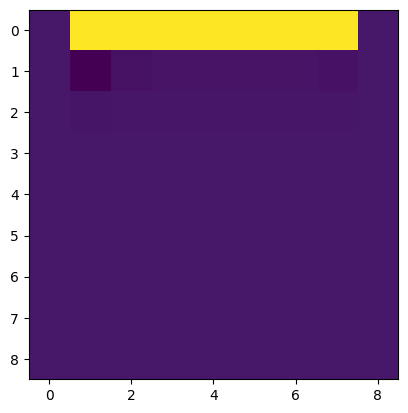

In [68]:
plt.imshow(data)

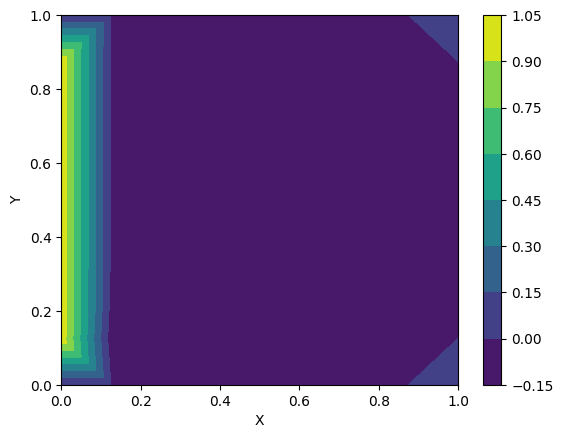

In [49]:
# Reshape the points array to get the x and y coordinates separately
x = points[:, 0]
y = points[:, 1]

# Plot the mesh
plt.tricontourf(x, y, point_data, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.show()

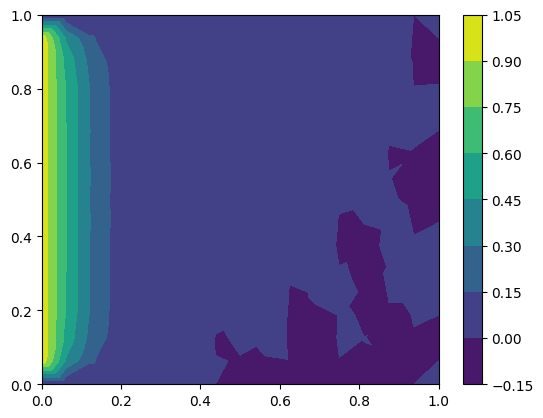

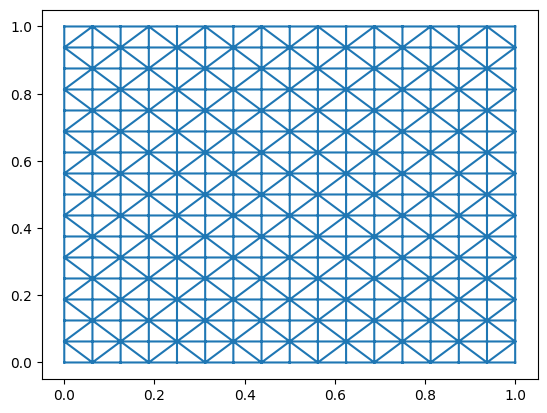

In [5]:
coord = np.zeros((289, 2))
val = np.zeros(289)
with open(save_dir + "output.txt", "r") as f:
    for i, line in enumerate(f):
        coord[i, 0], coord[i, 1], val[i] = line.split()

plt.tricontourf(coord[:, 0], coord[:, 1], val)
plt.colorbar()
plt.show()

In [53]:
val

array([ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  4.18211392e-01,
        0.00000000e+00,  1.00000000e+00,  1.00000000e+00,  2.41265626e-01,
        5.80194834e-01,  5.43596693e-01,  1.00000000e+00,  1.65867383e-01,
        0.00000000e+00,  5.60705975e-02,  0.00000000e+00,  1.00000000e+00,
        2.80319690e-01,  5.92273347e-01,  5.89806749e-01,  1.00000000e+00,
        2.72297045e-01,  2.29768755e-02,  1.00324307e-01,  8.68987300e-02,
        1.42208861e-02,  0.00000000e+00,  2.80134988e-03,  0.00000000e+00,
        1.00000000e+00,  2.82639424e-01,  5.92779884e-01,  5.92449023e-01,
        1.00000000e+00,  2.83700365e-01,  2.93531192e-02,  1.05944603e-01,
        1.04612861e-01,  2.74690984e-02,  1.15733087e-03,  5.76361741e-03,
        4.75227777e-03,  5.07675584e-04,  0.00000000e+00,  1.02476962e-04,
        0.00000000e+00,  1.00000000e+00,  2.82711490e-01,  5.92736894e-01,
        5.92522467e-01,  1.00000000e+00,  2.84202130e-01,  3.00111004e-02,
        1.06243659e-01,  

# Calculate gradient

In [14]:
import cv2

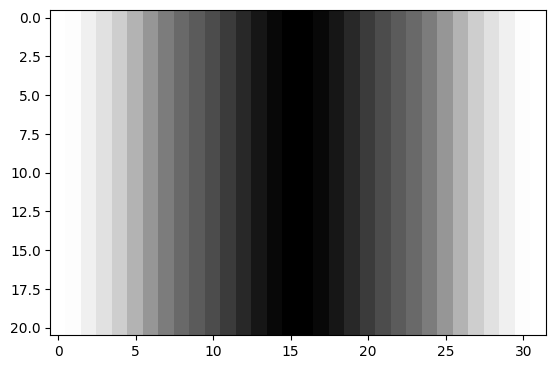

In [15]:
img = cv2.imread('../data/7_cropped.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

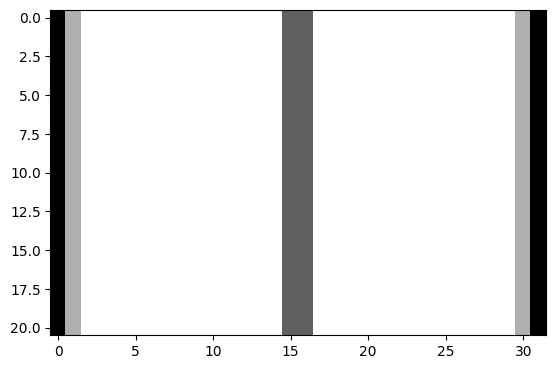

In [17]:
grad_x = cv2.Scharr(img, cv2.CV_64F, 1, 0)
grad_x = cv2.convertScaleAbs(grad_x)
plt.imshow(grad_x, cmap='gray')

In [13]:
grad_x = cv2.Sobel(img, ddepth=cv2.CV_32F, dx=1, dy=1, ksize=-1)
grad_y = cv2.Sobel(img, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=-1)

error: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/deriv.cpp:67: error: (-215:Assertion failed) dx >= 0 && dy >= 0 && dx+dy == 1 in function 'getScharrKernels'


In [7]:
grad_x = cv2.convertScaleAbs(grad_x)
grad_y = cv2.convertScaleAbs(grad_y)

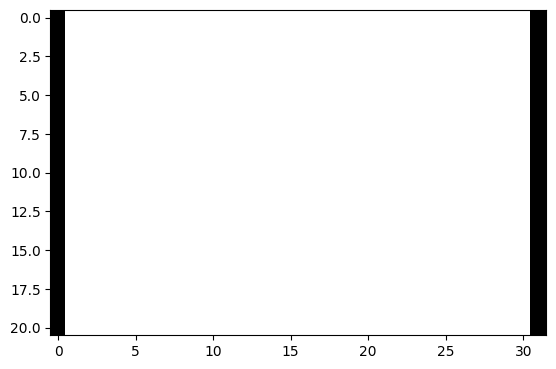

In [8]:
plt.imshow(grad_x, cmap='gray')

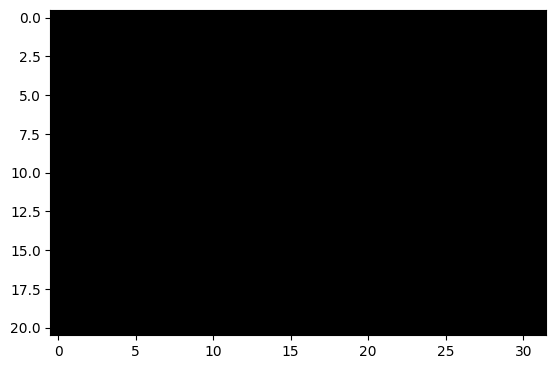

In [8]:
plt.imshow(grad_y, cmap='gray')

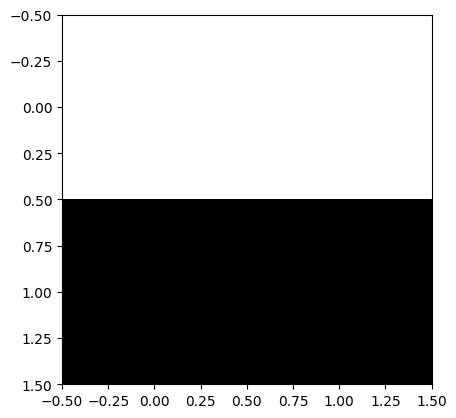

In [19]:
u = torch.tensor([1., 1, 0, 0], dtype=torch.float16).reshape(1, 2, 2)
plt.imshow(u[0], cmap='gray')

In [32]:
u_x = cv2.Scharr(u.numpy(), ddepth=cv2.CV_32F, dx=1, dy=0)

error: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/deriv.cpp:61: error: (-215:Assertion failed) ktype == CV_32F || ktype == CV_64F in function 'getScharrKernels'


In [25]:
u.numpy()

array([[[1., 1.],
        [0., 0.]]], dtype=float16)

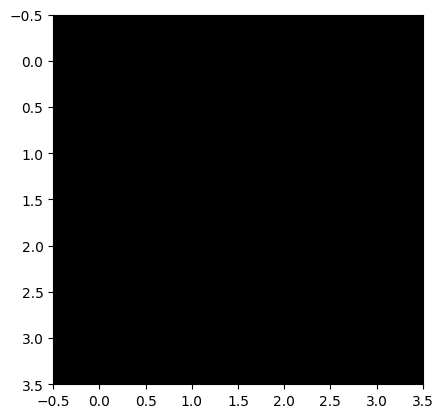

In [ ]:
        # calculate divergence using OpenCV
        # grad_u = torch.zeros_like(u)
        # grad_v = torch.zeros_like(v)
        # grad_w = torch.zeros_like(w)
        # for i in range(u.shape[0]):
        #     grad_u_x = cv2.Scharr(u, ddepth=cv2.CV_32F, dx=1, dy=0)
        #     grad_u_y = cv2.Scharr(u, ddepth=cv2.CV_32F, dx=0, dy=1)
        #     grad_u[i] = cv2.addWeighted(grad_u_x, 0.5, grad_u_y, 0.5, 0)

        #     grad_v_x = cv2.Scharr(v, ddepth=cv2.CV_32F, dx=1, dy=0)
        #     grad_v_y = cv2.Scharr(v, ddepth=cv2.CV_32F, dx=0, dy=1)
        #     grad_v[i] = cv2.addWeighted(grad_v_x, 0.5, grad_v_y, 0.5, 0)

        #     grad_w_x = cv2.Scharr(w, ddepth=cv2.CV_32F, dx=1, dy=0)
        #     grad_w_y = cv2.Scharr(w, ddepth=cv2.CV_32F, dx=0, dy=1)
        #     grad_w[i] = cv2.addWeighted(grad_w_x, 0.5, grad_w_y, 0.5, 0)

# 2D

In [3]:
y_pred = torch.randn(size=(16, 3, 96, 96))
y_pred.shape

torch.Size([16, 3, 96, 96])

In [4]:
u = y_pred[:,:,:,0]
v = y_pred[:,:,:,1]
w = y_pred[:,:,:,2]

In [5]:
u.shape

torch.Size([16, 3, 96])

In [16]:
x = torch.linspace(-20, 20, 20, requires_grad=True)
x.shape

torch.Size([20])

In [17]:
x

tensor([-20.0000, -17.8947, -15.7895, -13.6842, -11.5789,  -9.4737,  -7.3684,
         -5.2632,  -3.1579,  -1.0526,   1.0526,   3.1579,   5.2632,   7.3684,
          9.4737,  11.5789,  13.6842,  15.7895,  17.8947,  20.0000],
       requires_grad=True)

In [18]:
Y = x**2

In [19]:
Y.shape

torch.Size([20])

In [21]:
Y.sum().backward()

In [ ]:
Y.backward()

In [12]:
y = torch.sum(Y)

In [13]:
y

tensor(2947.3687, grad_fn=<SumBackward0>)

In [14]:
y.backward()

In [15]:
x.grad

tensor([-40.0000, -35.7895, -31.5789, -27.3684, -23.1579, -18.9474, -14.7368,
        -10.5263,  -6.3158,  -2.1053,   2.1053,   6.3158,  10.5263,  14.7368,
         18.9474,  23.1579,  27.3684,  31.5789,  35.7895,  40.0000])

In [22]:
torch.ones(4)  # Faster: y.sum().backward()

tensor([1., 1., 1., 1.])

In [31]:
Y = torch.arange(0., 8., 1, requires_grad=True).reshape(2, 4)
Y

tensor([[0., 1., 2., 3.],
        [4., 5., 6., 7.]], grad_fn=<ViewBackward0>)

In [36]:
Y.backward(gradient=torch.ones_like(Y))

In [29]:
Y.grad

In [37]:
x = torch.arange(0., 4., 1, requires_grad=True)
y = torch.arange(10., 14., 1, requires_grad=True)
z = torch.arange(20., 24., 1, requires_grad=True)
x, y, z

(tensor([0., 1., 2., 3.], requires_grad=True),
 tensor([10., 11., 12., 13.], requires_grad=True),
 tensor([20., 21., 22., 23.], requires_grad=True))

In [38]:
u = 3 * x ** 3 - y ** 2  + 5 * z
v = 4 * x ** 2 - 2 * y + z**2
w = 6 + y**2 - 2 * z ** 3

In [40]:
# this works
div = 0
u.sum().backward()

div += x.grad

y.grad.zero_()
v.sum().backward()
div += y.grad


z.grad.zero_()
w.sum().backward()
div += z.grad

div

tensor([-2402., -2639., -2870., -3095.])

# 3D

In [47]:
x = torch.arange(0., 5., 1, requires_grad=True)
y = torch.arange(10., 15., 1, requires_grad=True)
z = torch.arange(20., 25., 1, requires_grad=True)
assert x.shape[0] == y.shape[0], "x and y must have the same shape[0]"
n = x.shape[0]
x, y, z

(tensor([0., 1., 2., 3., 4.], requires_grad=True),
 tensor([10., 11., 12., 13., 14.], requires_grad=True),
 tensor([20., 21., 22., 23., 24.], requires_grad=True))

In [37]:
A = torch.zeros((1, 3, x.shape[0], y.shape[0]))

In [38]:
for i in range(x.shape[0]):
    for j in range(y.shape[0]):
        A[0, 0, i, j] = 3 * (x[i] ** 3) - (y[j] ** 2) + 5 * z[0]
        A[0, 1, i, j] = 4 * (x[i] ** 2) - 2 * y[j] ** 2 + (z[0] ** 2)
        A[0, 2, i, j] = 6 + (y[j] ** 2) - 2 * (z[0] ** 3)

In [39]:
A, A.shape

(tensor([[[[ 0.0000e+00, -2.1000e+01, -4.4000e+01, -6.9000e+01, -9.6000e+01],
           [ 3.0000e+00, -1.8000e+01, -4.1000e+01, -6.6000e+01, -9.3000e+01],
           [ 2.4000e+01,  3.0000e+00, -2.0000e+01, -4.5000e+01, -7.2000e+01],
           [ 8.1000e+01,  6.0000e+01,  3.7000e+01,  1.2000e+01, -1.5000e+01],
           [ 1.9200e+02,  1.7100e+02,  1.4800e+02,  1.2300e+02,  9.6000e+01]],
 
          [[ 2.0000e+02,  1.5800e+02,  1.1200e+02,  6.2000e+01,  8.0000e+00],
           [ 2.0400e+02,  1.6200e+02,  1.1600e+02,  6.6000e+01,  1.2000e+01],
           [ 2.1600e+02,  1.7400e+02,  1.2800e+02,  7.8000e+01,  2.4000e+01],
           [ 2.3600e+02,  1.9400e+02,  1.4800e+02,  9.8000e+01,  4.4000e+01],
           [ 2.6400e+02,  2.2200e+02,  1.7600e+02,  1.2600e+02,  7.2000e+01]],
 
          [[-1.5894e+04, -1.5873e+04, -1.5850e+04, -1.5825e+04, -1.5798e+04],
           [-1.5894e+04, -1.5873e+04, -1.5850e+04, -1.5825e+04, -1.5798e+04],
           [-1.5894e+04, -1.5873e+04, -1.5850e+04, -1.5825

In [40]:
x.grad == None

True

In [41]:
div = 0
(A.sum((2,3)))[0,0].backward(retain_graph=True)

div += x.grad

y.grad.zero_() # gradinent accumulated from u.sum().backward() because u depends on y
(A.sum((2,3)))[0,1].backward(retain_graph=True)
div += y.grad


# z.grad.zero_()
# w.sum().backward()
# div += z.grad

div = div / n
div

tensor([-40., -35., -12.,  29.,  88.])

# Next step

In [71]:
n = 5
x = torch.arange(0., float(n), 1, requires_grad=True)
y = torch.arange(10., 10.+float(n), 1, requires_grad=True)
z = torch.zeros(size=(n, ))
assert x.shape[0] == y.shape[0], "x and y must have the same shape[0]"
x, y, z

(tensor([0., 1., 2., 3., 4.], requires_grad=True),
 tensor([10., 11., 12., 13., 14.], requires_grad=True),
 tensor([0., 0., 0., 0., 0.]))

In [101]:
batch_size = 2

In [102]:
A = torch.zeros((batch_size, 3, n, n))

In [114]:
for i in range(n):
    for j in range(n):
        A[0, 0, i, j] = 3 * (x[i] ** 3) - (y[j] ** 2)
        A[0, 1, i, j] = 4 * (x[i] ** 2) - 2 * y[j] ** 2
        A[0, 2, i, j] = 6 + (y[j] ** 2)

        A[1, 0, i, j] = 2 * (x[i] ** 3) - (y[j] ** 2)
        A[1, 1, i, j] = 4 * (x[i] ** 2) - 3 * y[j] ** 2
        A[1, 2, i, j] = 6 + (y[j] ** 2)
    
analytical_div = [
    9 * x ** 2 - 4 * y,
    6 * x ** 2 - 6 * y,
]

In [115]:
A, A.shape

(tensor([[[[-100., -121., -144., -169., -196.],
           [ -97., -118., -141., -166., -193.],
           [ -76.,  -97., -120., -145., -172.],
           [ -19.,  -40.,  -63.,  -88., -115.],
           [  92.,   71.,   48.,   23.,   -4.]],
 
          [[-200., -242., -288., -338., -392.],
           [-196., -238., -284., -334., -388.],
           [-184., -226., -272., -322., -376.],
           [-164., -206., -252., -302., -356.],
           [-136., -178., -224., -274., -328.]],
 
          [[ 106.,  127.,  150.,  175.,  202.],
           [ 106.,  127.,  150.,  175.,  202.],
           [ 106.,  127.,  150.,  175.,  202.],
           [ 106.,  127.,  150.,  175.,  202.],
           [ 106.,  127.,  150.,  175.,  202.]]],
 
 
         [[[-100., -121., -144., -169., -196.],
           [ -98., -119., -142., -167., -194.],
           [ -84., -105., -128., -153., -180.],
           [ -46.,  -67.,  -90., -115., -142.],
           [  28.,    7.,  -16.,  -41.,  -68.]],
 
          [[-300., -363.,

In [116]:
for i in range(batch_size):
    if x.grad is not None:
        x.grad.zero_()
        y.grad.zero_()
    div = 0
    (A.sum((2,3)))[i,0].backward(retain_graph=True)

    div += x.grad

    y.grad.zero_() # gradinent accumulated from u.sum().backward() because u depends on y
    (A.sum((2,3)))[i,1].backward(retain_graph=True)
    div += y.grad


    # z.grad.zero_()
    # w.sum().backward()
    # div += z.grad

    div = div / n
    print(div)
    print(analytical_div[i])

tensor([-40., -35., -12.,  29.,  88.])
tensor([-40., -35., -12.,  29.,  88.], grad_fn=<SubBackward0>)
tensor([-60., -60., -48., -24.,  12.])
tensor([-60., -60., -48., -24.,  12.], grad_fn=<SubBackward0>)


# Maybe what we need

In [2]:
import cv2

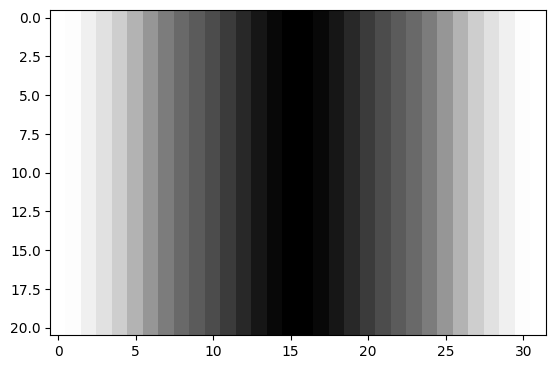

In [5]:
img = cv2.imread('../data/7_cropped.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

In [12]:
n_y, n_x = img.shape

In [ ]:
img

In [13]:
grad_y, grad_x = np.gradient(img)

In [14]:
img.shape, grad_x.shape, grad_y.shape

((21, 32), (21, 32), (21, 32))

In [15]:
img

array([[215, 213, 204, 193, 179, 160, 139, 120, 107,  96,  85,  73,  60,
         46,  36,  30,  30,  36,  46,  60,  73,  85,  96, 107, 120, 139,
        160, 179, 193, 204, 213, 215],
       [215, 213, 204, 193, 179, 160, 139, 120, 107,  96,  85,  73,  60,
         46,  36,  30,  30,  36,  46,  60,  73,  85,  96, 107, 120, 139,
        160, 179, 193, 204, 213, 215],
       [215, 213, 204, 193, 179, 160, 139, 120, 107,  96,  85,  73,  60,
         46,  36,  30,  30,  36,  46,  60,  73,  85,  96, 107, 120, 139,
        160, 179, 193, 204, 213, 215],
       [215, 213, 204, 193, 179, 160, 139, 120, 107,  96,  85,  73,  60,
         46,  36,  30,  30,  36,  46,  60,  73,  85,  96, 107, 120, 139,
        160, 179, 193, 204, 213, 215],
       [215, 213, 204, 193, 179, 160, 139, 120, 107,  96,  85,  73,  60,
         46,  36,  30,  30,  36,  46,  60,  73,  85,  96, 107, 120, 139,
        160, 179, 193, 204, 213, 215],
       [215, 213, 204, 193, 179, 160, 139, 120, 107,  96,  85,  73,  60,
  

In [16]:
grad_x

array([[ -2. ,  -5.5, -10. , -12.5, -16.5, -20. , -20. , -16. , -12. ,
        -11. , -11.5, -12.5, -13.5, -12. ,  -8. ,  -3. ,   3. ,   8. ,
         12. ,  13.5,  12.5,  11.5,  11. ,  12. ,  16. ,  20. ,  20. ,
         16.5,  12.5,  10. ,   5.5,   2. ],
       [ -2. ,  -5.5, -10. , -12.5, -16.5, -20. , -20. , -16. , -12. ,
        -11. , -11.5, -12.5, -13.5, -12. ,  -8. ,  -3. ,   3. ,   8. ,
         12. ,  13.5,  12.5,  11.5,  11. ,  12. ,  16. ,  20. ,  20. ,
         16.5,  12.5,  10. ,   5.5,   2. ],
       [ -2. ,  -5.5, -10. , -12.5, -16.5, -20. , -20. , -16. , -12. ,
        -11. , -11.5, -12.5, -13.5, -12. ,  -8. ,  -3. ,   3. ,   8. ,
         12. ,  13.5,  12.5,  11.5,  11. ,  12. ,  16. ,  20. ,  20. ,
         16.5,  12.5,  10. ,   5.5,   2. ],
       [ -2. ,  -5.5, -10. , -12.5, -16.5, -20. , -20. , -16. , -12. ,
        -11. , -11.5, -12.5, -13.5, -12. ,  -8. ,  -3. ,   3. ,   8. ,
         12. ,  13.5,  12.5,  11.5,  11. ,  12. ,  16. ,  20. ,  20. ,
         16.5,  

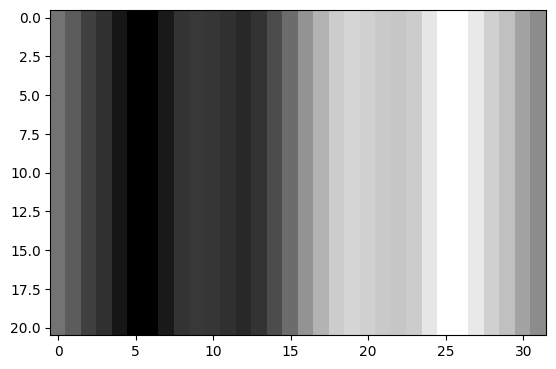

In [17]:
plt.imshow(grad_x, cmap='gray')

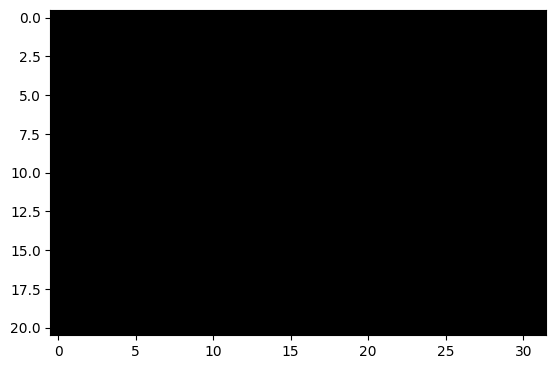

In [18]:
plt.imshow(grad_y, cmap='gray')

# Extra

In [90]:
x = torch.arange(0., 5., 1, requires_grad=True)
y = torch.arange(10., 15., 1, requires_grad=True)
z = torch.arange(20., 25., 1, requires_grad=True)
assert x.shape[0] == y.shape[0], "x and y must have the same shape[0]"
n = x.shape[0]
x, y, z

(tensor([0., 1., 2., 3., 4.], requires_grad=True),
 tensor([10., 11., 12., 13., 14.], requires_grad=True),
 tensor([20., 21., 22., 23., 24.], requires_grad=True))

In [91]:
A = torch.zeros((1, 3, x.shape[0], y.shape[0]))

In [92]:
for i in range(x.shape[0]):
    for j in range(y.shape[0]):
        A[0, 0, i, j] = 3 * (x[i] ** 3) - (y[j] ** 2) + 5 * z[0]
        A[0, 1, i, j] = 4 * (x[i] ** 2) - 2 * y[j] ** 2 + (z[0] ** 2)
        A[0, 2, i, j] = 6 + (y[j] ** 2) - 2 * (z[0] ** 3)

In [93]:
A, A.shape

(tensor([[[[ 0.0000e+00, -2.1000e+01, -4.4000e+01, -6.9000e+01, -9.6000e+01],
           [ 3.0000e+00, -1.8000e+01, -4.1000e+01, -6.6000e+01, -9.3000e+01],
           [ 2.4000e+01,  3.0000e+00, -2.0000e+01, -4.5000e+01, -7.2000e+01],
           [ 8.1000e+01,  6.0000e+01,  3.7000e+01,  1.2000e+01, -1.5000e+01],
           [ 1.9200e+02,  1.7100e+02,  1.4800e+02,  1.2300e+02,  9.6000e+01]],
 
          [[ 2.0000e+02,  1.5800e+02,  1.1200e+02,  6.2000e+01,  8.0000e+00],
           [ 2.0400e+02,  1.6200e+02,  1.1600e+02,  6.6000e+01,  1.2000e+01],
           [ 2.1600e+02,  1.7400e+02,  1.2800e+02,  7.8000e+01,  2.4000e+01],
           [ 2.3600e+02,  1.9400e+02,  1.4800e+02,  9.8000e+01,  4.4000e+01],
           [ 2.6400e+02,  2.2200e+02,  1.7600e+02,  1.2600e+02,  7.2000e+01]],
 
          [[-1.5894e+04, -1.5873e+04, -1.5850e+04, -1.5825e+04, -1.5798e+04],
           [-1.5894e+04, -1.5873e+04, -1.5850e+04, -1.5825e+04, -1.5798e+04],
           [-1.5894e+04, -1.5873e+04, -1.5850e+04, -1.5825

In [99]:
if x.grad is not None:
    x.grad.zero_()

div = 0
A.backward(gradient=torch.ones_like(A), retain_graph=True)

div += x.grad

y.grad.zero_() # gradinent accumulated from u.sum().backward() because u depends on y
A.backward(gradient=torch.ones_like(A), retain_graph=True)
div += y.grad


# z.grad.zero_()
# w.sum().backward()
# div += z.grad

# div = div / n
div

tensor([-200., -135.,   20.,  265.,  600.])

In [98]:
torch.ones_like(A).shape

torch.Size([1, 3, 5, 5])